# Wordle Choices
I'm trying to compare python and c# here.  I did a C# polyglot notebook of this exact same problem earlier today.

## Get the Words

In [1]:
from pathlib import Path
words_path = Path.home().joinpath('OneDrive','DataFiles','words.txt')

In [2]:
fivers = set()
with open(words_path,'r') as words:
    while (line := words.readline()):
        line = line.strip()
        if(len(line) == 5):
            fivers.add(line.lower())
len(fivers)

9981

Ok, that's ten-thousand words.  Good!

## Count the letter frequency
Instead of getting the english letter frequency from Google, I'm going to get the actual letter frequency from our 5-letter words.  That frequencies might be skewed differently.

In [3]:
from collections import defaultdict

In [4]:
lcount = defaultdict(lambda: 0)
for word in fivers:
    for letter in word:
        lcount[letter] += 1

In [5]:
import matplotlib.pyplot as plt

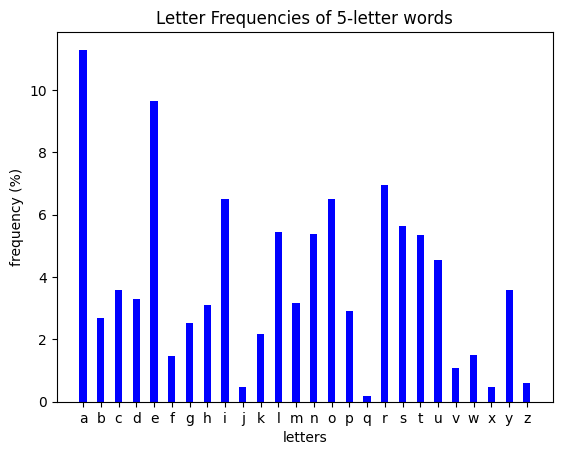

In [24]:
total_letters = len(fivers)*5
keyz = list(sorted(lcount.keys()))
valz = list(100*lcount[k]/total_letters for k in keyz)

plt.bar(keyz, valz, color ='blue', width = 0.4)
plt.xlabel("letters")
plt.ylabel("frequency (%)")
plt.title("Letter Frequencies of 5-letter words")
plt.show()

## Score the choices

I'm going to score the choices by getting a set of their letters, and then adding up the associated lcounts

In [7]:
from itertools import chain

In [8]:
def score(values, *strs):
    return sum(values[l] for l in set(chain(*strs)))

## Generate all 2-word combinations

In [9]:
import heapq as h
from itertools import combinations

In [10]:
def calculate(values, n = 5):
    queue = [[0, 'dummy']]*n
    h.heapify(queue)
    for (w1,w2) in combinations(fivers,2):
        h.heappushpop(queue, [ score(values, w1, w2), w1, w2 ])
    return queue

In [11]:
calculate(lcount, n=20)

[[33544, 'urate', 'linos'],
 [33544, 'urial', 'onset'],
 [33544, 'ureal', 'stion'],
 [33544, 'urial', 'seton'],
 [33544, 'urine', 'stola'],
 [33544, 'urent', 'aliso'],
 [33544, 'urial', 'steno'],
 [33544, 'urnal', 'sotie'],
 [33544, 'urial', 'stone'],
 [33544, 'urite', 'sloan'],
 [33544, 'uster', 'aloin'],
 [33544, 'uteri', 'salon'],
 [33544, 'urite', 'salon'],
 [33544, 'urson', 'laeti'],
 [33544, 'urnae', 'islot'],
 [33544, 'urnal', 'toise'],
 [33544, 'uster', 'anoli'],
 [33544, 'uster', 'anoil'],
 [33544, 'uteri', 'sloan'],
 [33544, 'utile', 'sonar']]

That's interesting, but I think we wanted to focus on consonants rather than vowels, so... let's zero-out the vowel scores:

In [13]:
novowel = lcount.copy()
for l in "aeiou": novowel[l] = 0

In [14]:
sorted(calculate(novowel, 10))

[[21066, 'strum', 'lynch'],
 [21129, 'darst', 'lynch'],
 [21129, 'darts', 'lynch'],
 [21129, 'dorts', 'lynch'],
 [21129, 'drest', 'lynch'],
 [21129, 'durst', 'lynch'],
 [21129, 'north', 'scyld'],
 [21129, 'strad', 'lynch'],
 [21129, 'strid', 'lynch'],
 [21129, 'thorn', 'scyld']]

## Continuations

Ok, so let's go with "lynch" and "darts" ... what should the next word be, if we are completely flummoxed still?  Since we know 'a' and 'e' are the most common vowels, and we used an 'a' already. let's zero-out the vowels other than 'e' this time to force an 'e' in there:

In [15]:
third = lcount.copy()
for l in "lynchdartsiou": third[l] = 0

In [16]:
def calculate1(values, n = 5):
    queue = [[0, 'dummy']]*n
    h.heapify(queue)
    for w in fivers:
        h.heappushpop(queue, [ score(values, w), w ])
    return queue

In [17]:
sorted(calculate1(third, 10))

[[8322, 'befop'],
 [8338, 'bepaw'],
 [8468, 'embow'],
 [8917, 'kempt'],
 [8917, 'kempy'],
 [8917, 'skemp'],
 [8991, 'begem'],
 [8991, 'begum'],
 [8991, 'embog'],
 [9178, 'pombe']]

Ok, 'pombe' it is... (btw it is a _fermented drink made with various kinds of grain_)

In [19]:
fourth = lcount.copy()
for l in "lynchdartspombe": fourth[l] = 0

In [20]:
sorted(calculate1(fourth,10))

[[6773, 'unrig'],
 [6891, 'khuzi'],
 [7006, 'guijo'],
 [7006, 'gulix'],
 [7310, 'kufic'],
 [7498, 'fingu'],
 [7498, 'fungi'],
 [7514, 'unwig'],
 [7849, 'gucki'],
 [7849, 'kingu']]

Of these, I chose 'fungi' since it is a word that Wordle will accept.

In [21]:
fifth = lcount.copy()
for l in "lynchdartspombefungi": fifth[l] = 0

In [22]:
sorted(calculate1(fifth,10))

[[1817, 'wokas'],
 [1817, 'wonky'],
 [1817, 'works'],
 [1817, 'worky'],
 [1817, 'wrack'],
 [1817, 'wreak'],
 [1817, 'wreck'],
 [1817, 'wrick'],
 [1817, 'wroke'],
 [1915, 'quawk']]

So we will finish with 'quawk'!

## Conclusion

So, the words to try are:

1. darts
2. lynch
3. pombe
4. fungi
5. quawk

The only missing letters are: 

In [23]:
set("abcdefghijklmnopqrstuvwxyz") - set("dartslynchpombefungiquawk")

{'j', 'v', 'x', 'z'}

In the worst case you could reach your last guess with all but 4 of the letters accounted for!

### Regarding C#

The 2-word `calculate` method in c# took around 31 to 33 seconds on this laptop.  The python equivalent took about 41 seconds.  So 33% slower.  However, generating the plot with `matplotlib` was __way__ easier than what you needed to do in C#.